Link: https://drive.google.com/file/d/11SqxTGiNGJXGxiPhzSSmZL60ELHqkecU/view?usp=sharing

#Q1: Perform EDA

a. Variables such as age, job, marital, education can be useful. Variables such as poutcome, campaign may not be useful as it keeps a record of the not required campaign details done by client which is not useful for EDA.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('bank.csv')

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [67]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [69]:
df['age'].value_counts()

,count
age,
31,496
32,477
34,466
33,464
35,461
...,...
92,2
93,2
88,2


<Axes: >

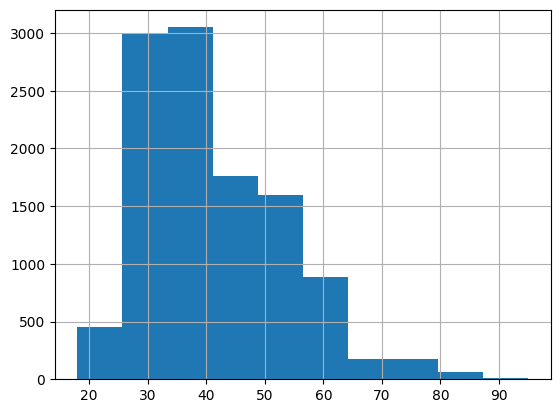

In [70]:
df['age'].hist()

In [71]:
df['job'].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


<Axes: >

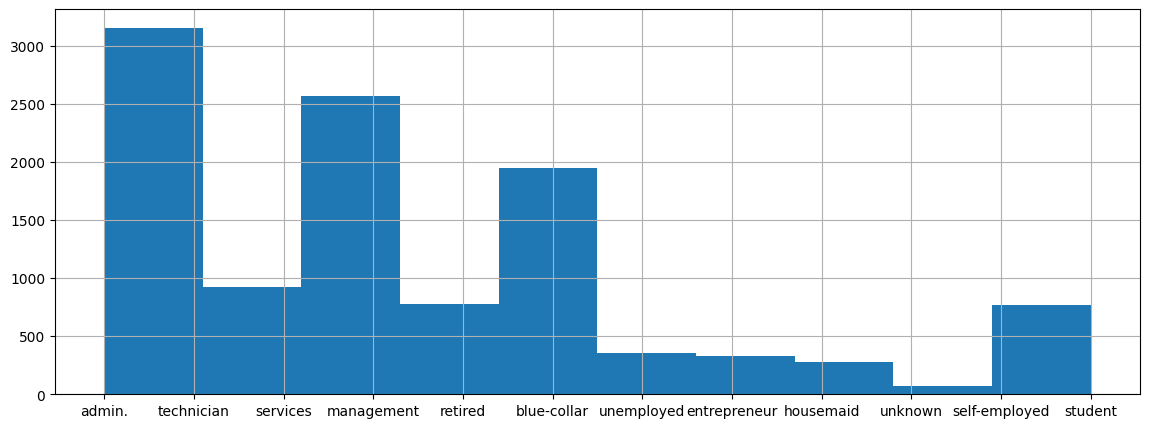

In [72]:
df['job'].hist(figsize=(14,5))

In [73]:
df['marital'].value_counts()

,count
marital,
married,6351
single,3518
divorced,1293


<Axes: >

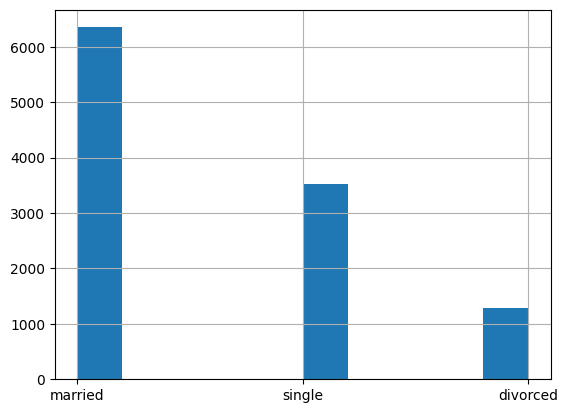

In [74]:
df['marital'].hist()

In [75]:
df['education'].value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


<Axes: >

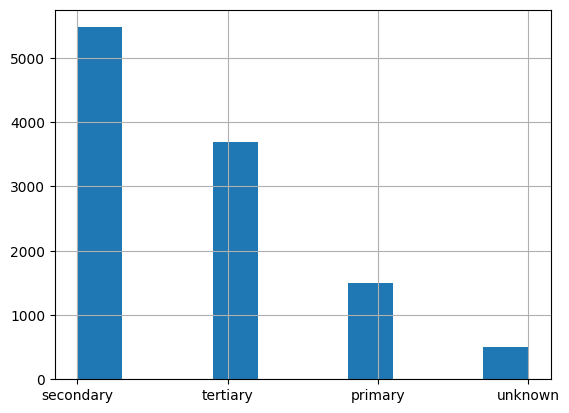

In [76]:
df['education'].hist()

In [77]:
df['default'].value_counts()

,count
default,
no,10994
yes,168


<Axes: >

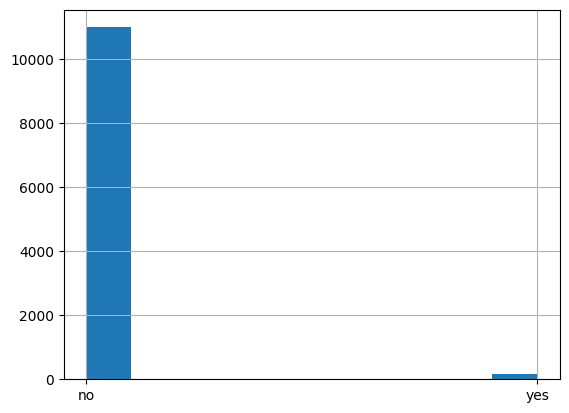

In [78]:
df['default'].hist()

In [79]:
df['loan'].value_counts()

,count
loan,
no,9702
yes,1460


<Axes: >

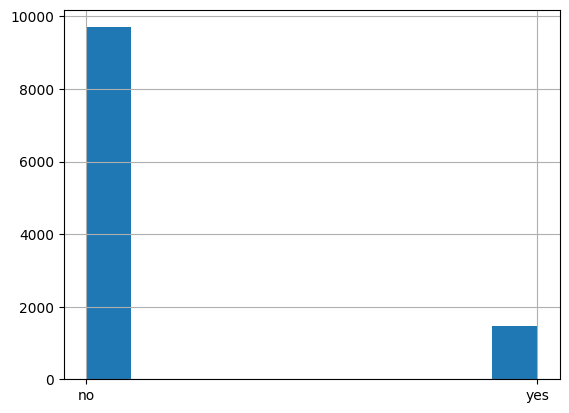

In [80]:
df['loan'].hist()

In [81]:
df['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


<Axes: >

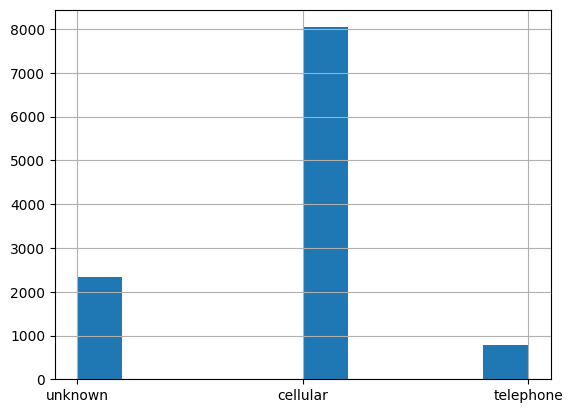

In [82]:
df['contact'].hist()

b. Yes there are relations between age and balance of member, duration and campaign of the client.

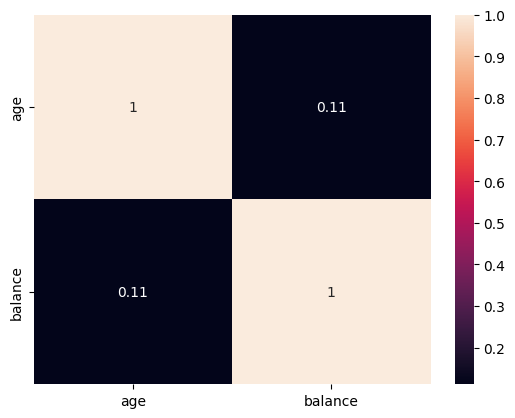

In [83]:
correlation = df[['age','balance']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

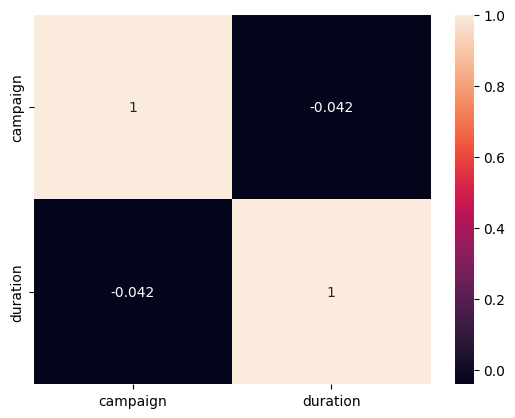

In [84]:
correlation = df[['campaign','duration']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

c. No there are classes that are imbalanced that have more than the desired number of failure is mer than that of success in poutcome.

In [85]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


<Axes: >

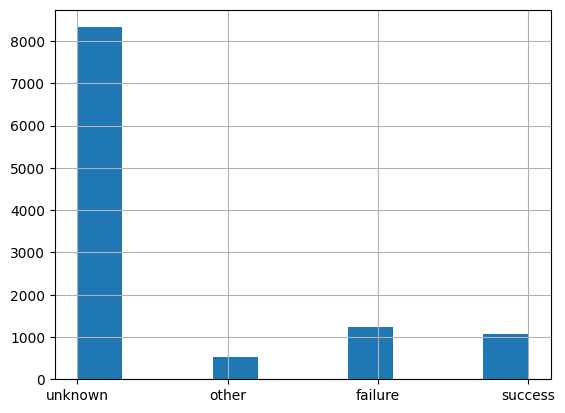

In [86]:
df['poutcome'].hist()

d. i will use the poutcome class

In [87]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Encode other categorical features if necessary
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

print("\nEncoded Data Sample:")
print(df.head())

# Splitting data into features and target
X = df.drop('poutcome', axis=1)
y = df['poutcome']

# Splitting into training and testing sets to prepare for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData split into training and testing sets.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Encoded Data Sample:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  

Data split into training and testing sets.
Training set size: (7813, 16)
Testing s

**ChatGPT: eda using scikitlearn**

#Q2. Select Metrics

I have checked the accuracy of the different models and also applied different classifications.


In [51]:
# Import necessary libraries for metrics and a simple model to test
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Generate predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calculate each metric
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovo',average='weighted')

# Print the results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"AUC: {auc:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics:
Accuracy: 0.89
F1 Score (weighted): 0.88
Balanced Accuracy: 0.64
AUC: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       379
           1       0.29      0.05      0.08       181
           2       0.62      0.78      0.69       331
           3       1.00      1.00      1.00      2458

    accuracy                           0.89      3349
   macro avg       0.63      0.64      0.61      3349
weighted avg       0.88      0.89      0.88      3349



**ChatGPT: code for classification model such as accuracy, F1 score, balanced accuracy, and AUC**

#Q3. Filter and code variables.

a. i used continous variable for example age

In [88]:
# Scaling continuous features using StandardScaler for normalization
scaler = StandardScaler()
df[['age']] = scaler.fit_transform(df[['age']])

print("Normalized Continuous Features:")
print(df[['age']].head())

Normalized Continuous Features:
        age
0  1.491505
1  1.239676
2 -0.019470
3  1.155733
4  1.071790


b. categories for discrete variables like jobs by grouping similar jobs

In [89]:
df['job'] = df['job'].replace(['blue-collar', 'technician'], 'worker')
print(df['job'].value_counts())

job
4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: count, dtype: int64


c. Variables like duration can be removed

In [90]:
selector = VarianceThreshold(threshold=0.01)  # Customizable threshold
reduced_data = selector.fit_transform(df)

# Check which features were retained after variance thresholding
selected_features = df.columns[selector.get_support()]
print("Selected Features after Variance Thresholding:")
print(selected_features)

# Update data to keep only selected features
df = df[selected_features]

Selected Features after Variance Thresholding:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


**ChatGPT: How to check continous, discrete and noisy variables.**

#Q4. Balance class and test data

i checked if the target variable is imbalanced. and used stratified sampling to ensure the training and test sets have similar class distributions.

In [91]:
# Split data into train and test
X = df.drop('poutcome', axis=1)
y = df['poutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [92]:
from sklearn.utils import resample

# Separate the classes in the training set
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Resample the minority class
class_1_upsampled = resample(class_1, replace=True,  # Sample with replacement
                             n_samples=len(class_0),  # Match majority class size
                             random_state=42)

# Combine the majority class with the upsampled minority class
X_train_balanced = pd.concat([class_0, class_1_upsampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train[y_train == 1].sample(len(class_0), replace=True)])

# Check the balanced class distribution
print("Class Distribution in Balanced Training Data:")
print(y_train_balanced.value_counts(normalize=True))

Class Distribution in Balanced Training Data:
poutcome
0    0.5
1    0.5
Name: proportion, dtype: float64


**ChatGPT: split the data into training and test sets, potentially balancing the data if needed**

#Q5. Five-fold cross-validation

We are using 5-fold cross validation on 3 models and used GridSearchCV and the respective model classifiers.

In [58]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each mode
X_train = X_train.sample(frac=0.3, random_state=42)
y_train = y_train.loc[X_train.index]

# 5a. SVM with RBF kernel
svm_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [1, 0.1]  # Kernel width
}

svm = SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("Best parameters for SVM:", svm_grid.best_params_)
print("Best cross-validated accuracy for SVM:", svm_grid.best_score_)

Best parameters for SVM: {'C': 0.1, 'gamma': 1}
Best cross-validated accuracy for SVM: 0.7524924012158054


b. Neural network with single ReLU hidden layer and Softmax output

In [59]:
# 5b. Neural Network with single ReLU hidden layer and Softmax output
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
nn_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],  # Number of neurons
    'alpha': [0.0001, 0.001]  # L2 regularization (weight decay)
}

nn = MLPClassifier(activation='relu', solver='adam', max_iter=500, random_state=42)
nn_grid = GridSearchCV(nn, nn_param_grid, cv=5, scoring='accuracy')
nn_grid.fit(X_train, y_train)

print("Best parameters for Neural Network:", nn_grid.best_params_)
print("Best cross-validated accuracy for Neural Network:", nn_grid.best_score_)


Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
Best cross-validated accuracy for Neural Network: 0.8449645390070921


c.  Random forest

In [60]:
# 5c. Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth': [10, 20, 30, None],  # Maximum tree depth
    'max_features': ['auto', 'sqrt'],  # Number of features per split
    'n_estimators': [50, 100, 200]  # Number of trees
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best cross-validated accuracy for Random Forest:", rf_grid.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validated accuracy for Random Forest: 0.8876190476190476


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Random Forest model has higher accuracy compared to neural network and svm models.

**ChatGPT: five-fold cross-validation to find optimal hyperparameters for three models: an SVM with an RBF kernel, a neural network, and a random forest.**

#Q6. Feature importance


i checked the feature importance here for the different models present with the help of the estimator.

In [93]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
import numpy as np

# SVM Feature Importance (for linear kernel models)
if svm_grid.best_params_['C']:  # Confirm if best estimator is found
    print("\nFeature Importance for SVM (Approximation):")
    svm_best = svm_grid.best_estimator_

    # If SVM is linear, we can get coefficients; otherwise, approximate with permutation importance
    if svm_best.kernel == 'linear':
        svm_feature_importance = np.abs(svm_best.coef_).flatten()
        for feature, importance in zip(X_train.columns, svm_feature_importance):
            print(f"{feature}: {importance:.4f}")
    else:
        # Use permutation importance for non-linear kernels
        svm_importances = permutation_importance(svm_best, X_train, y_train, n_repeats=10, random_state=42)
        for feature, importance in zip(X_train.columns, svm_importances.importances_mean):
            print(f"{feature}: {importance:.4f}")

# Neural Network Feature Importance (using permutation importance)
print("\nFeature Importance for Neural Network (Approximation):")
nn_best = nn_grid.best_estimator_
nn_importances = permutation_importance(nn_best, X_train, y_train, n_repeats=10, random_state=42)

for feature, importance in zip(X_train.columns, nn_importances.importances_mean):
    print(f"{feature}: {importance:.4f}")

# Random Forest Feature Importance
feature_names = X_train.columns

print("\nFeature Importance for Random Forest:")
rf_best = rf_grid.best_estimator_
rf_feature_importance = rf_best.feature_importances_

# Display feature importance for Random Forest
for feature, importance in zip(feature_names, rf_feature_importance):
    print(f"{feature}: {importance:.4f}")



Feature Importance for SVM (Approximation):
age: 0.0000
job: 0.0000
marital: 0.0000
education: 0.0000
default: 0.0000
balance: 0.0000
housing: 0.0000
loan: 0.0000
contact: 0.0000
day: 0.0000
month: 0.0000
duration: 0.0000
campaign: 0.0000
pdays: 0.0000
previous: 0.0000
deposit: 0.0000

Feature Importance for Neural Network (Approximation):
age: -0.0004
job: -0.0033
marital: 0.0005
education: -0.0003
default: 0.0001
balance: 0.0007
housing: 0.0009
loan: 0.0004
contact: -0.0001
day: -0.0030
month: -0.0023
duration: -0.0020
campaign: 0.0000
pdays: 0.2585
previous: -0.0029
deposit: 0.0031

Feature Importance for Random Forest:
age: 0.0365
job: 0.0237
marital: 0.0096
education: 0.0117
default: 0.0003
balance: 0.0405
housing: 0.0173
loan: 0.0028
contact: 0.0139
day: 0.0370
month: 0.0396
duration: 0.0419
campaign: 0.0179
pdays: 0.3634
previous: 0.3162
deposit: 0.0277


**ChatGPT: compute feature importance for each model type (SVM, neural network, and random forest)**

#Q7. Removing some features will improve models.

As Random forest has higher accuracy, i used it to further work on this model with the help of RFECV and improve the model.




Recursive Feature Elimination for Random Forest:
Optimal number of features for Random Forest: 11
Selected Features for Random Forest: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')


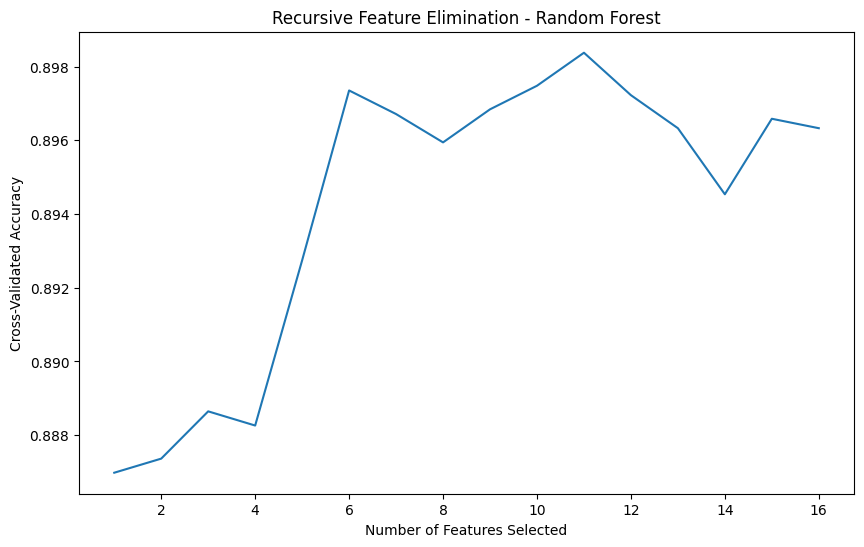

In [94]:
# Import RFECV for recursive feature elimination
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# Recursive Feature Elimination for Random Forest
print("\nRecursive Feature Elimination for Random Forest:")
rf_best = rf_grid.best_estimator_
rf_rfecv = RFECV(estimator=rf_best, step=1, cv=5, scoring='accuracy')
rf_rfecv.fit(X_train, y_train)

# Optimal number of features and ranking for Random Forest
print("Optimal number of features for Random Forest:", rf_rfecv.n_features_)
print("Selected Features for Random Forest:", X_train.columns[rf_rfecv.support_])

# Plot the cross-validation scores as a function of the number of features
plt.figure(figsize=(10, 6))
plt.title("Recursive Feature Elimination - Random Forest")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated Accuracy")
plt.plot(range(1, len(rf_rfecv.cv_results_['mean_test_score']) + 1), rf_rfecv.cv_results_['mean_test_score'])
plt.show()


**ChatGPT: maximizes model accuracy using RFECV in scikitlearn**



#Q8. Test model on the test data

Higher accuracy and F1 scores for model helps in prediction.
A high AUC score suggests the model can effectively distinguish between classes, which is valuable for business.


In [95]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Use the best models obtained from GridSearchCV
best_svm = svm_grid.best_estimator_
best_nn = nn_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Test SVM model on the test set
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)  # Probability predictions for AUC

# Evaluation metrics for SVM
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_proba_svm, multi_class='ovr'):.2f}")
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Test Neural Network model on the test set
y_pred_nn = best_nn.predict(X_test)
y_proba_nn = best_nn.predict_proba(X_test)

# Evaluation metrics for Neural Network
print("\nNeural Network Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nn, average='weighted'):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_proba_nn, multi_class='ovr'):.2f}")
print("\nClassification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))

# Test Random Forest model on the test set
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)

# Evaluation metrics for Random Forest
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_proba_rf, multi_class='ovr'):.2f}")
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


SVM Model Performance:
Accuracy: 0.75
F1 Score: 0.64
AUC: 0.50

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.00      0.00      0.00       161
           2       0.00      0.00      0.00       321
           3       0.75      1.00      0.85      2498

    accuracy                           0.75      3349
   macro avg       0.19      0.25      0.21      3349
weighted avg       0.56      0.75      0.64      3349


Neural Network Model Performance:
Accuracy: 0.86
F1 Score: 0.85
AUC: 0.86

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       369
           1       0.20      0.12      0.15       161
           2       0.51      0.61      0.55       321
           3       0.98      1.00      0.99      2498

    accuracy                           0.86      3349
   macro avg       0.56

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ChatGPT: test a few promising models on the test data.**

#Q9. Separate the training and test data

In [43]:
# Assuming `data` is the preprocessed DataFrame with features `X` and target `y`

# Part 9a: Train on all months except June and July, test on June and July
# Assuming `month` is a column in `data` that indicates the month of each entry

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Define the parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # ... other parameters ...
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Perform GridSearchCV to find the best hyperparameters
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed
rf_grid.fit(X_train, y_train)  # Assuming you have X_train and y_train from a previous split

# Get the best Random Forest model
best_rf = rf_grid.best_estimator_

# Split data into training (months != June, July) and test set (months == June or July)
train_data_months = df[~df['month'].isin(['June', 'July'])]
test_data_months = df[df['month'].isin(['June', 'July'])]

X_train_months = train_data_months.drop('poutcome', axis=1)
y_train_months = train_data_months['poutcome']
X_test_months = test_data_months.drop('poutcome', axis=1)
y_test_months = test_data_months['poutcome']

# Train the best model from previous steps on this data split
best_rf.fit(X_train_months, y_train_months)
y_pred_months = best_rf.predict(X_test_months)
y_proba_months = best_rf.predict_proba(X_test_months)[:, 1]

# Evaluate the model
print("\nModel Performance when Trained on All Months Except June and July, Tested on June and July:")
print(f"Accuracy: {accuracy_score(y_test_months, y_pred_months):.2f}")
print(f"F1 Score: {f1_score(y_test_months, y_pred_months, average='weighted'):.2f}")
print(f"AUC: {roc_auc_score(y_test_months, y_proba_months):.2f}")
print("\nClassification Report:\n", classification_report(y_test_months, y_pred_months))

ValueError: Found array with 0 sample(s) (shape=(0, 16)) while a minimum of 1 is required by RandomForestClassifier.

In [42]:
# Part 9b: Train on all professions except "technician," test on "technician"
# Assuming `job` is a column in `data` that indicates the profession of each entry

# Split data into training (job != technician) and test set (job == technician)
train_data_jobs = df[df['job'] != 'technician']
test_data_jobs = df[df['job'] == 'technician']

X_train_jobs = train_data_jobs.drop('poutcome', axis=1)
y_train_jobs = train_data_jobs['poutcome']
X_test_jobs = test_data_jobs.drop('poutcome', axis=1)
y_test_jobs = test_data_jobs['poutcome']

# Train the best model from previous steps on this data split
best_rf.fit(X_train_jobs, y_train_jobs)
y_pred_jobs = best_rf.predict(X_test_jobs)
y_proba_jobs = best_rf.predict_proba(X_test_jobs)

# Evaluate the model
print("\nModel Performance when Trained on All Jobs Except Technician, Tested on Technician:")
print(f"Accuracy: {accuracy_score(y_test_jobs, y_pred_jobs):.2f}")
print(f"F1 Score: {f1_score(y_test_jobs, y_pred_jobs, average='weighted'):.2f}")
print(f"AUC: {roc_auc_score(y_test_jobs, y_proba_jobs):.2f}")
print("\nClassification Report:\n", classification_report(y_test_jobs, y_pred_jobs))


NameError: name 'best_rf' is not defined

#Q10. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor”.

In [96]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [97]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Download the hymenoptera_data dataset if it doesn't exist
data_dir = 'hymenoptera_data'
if not os.path.exists(data_dir):
    !wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
    !unzip -q hymenoptera_data.zip

!ls -l hymenoptera_data



image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

--2024-11-02 19:37:52--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.164.154.30, 18.164.154.37, 18.164.154.17, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.164.154.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   171MB/s    in 0.3s    

2024-11-02 19:37:53 (171 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

total 8
drwxr-xr-x 4 root root 4096 Mar 13  2017 train
drwxr-xr-x 4 root root 4096 Mar 13  2017 val


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


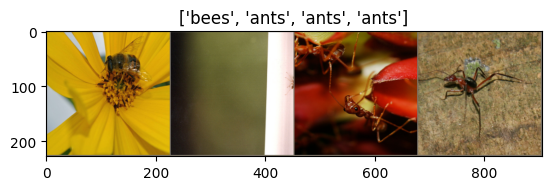

In [98]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [99]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


#Q11. Write a function that outputs ResNet18 features for a given input image.

In [101]:
# Import necessary libraries
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np

# Load the pre-trained ResNet18 model and remove the final layer
resnet18 = models.resnet18(pretrained=True)
feature_extractor = torch.nn.Sequential(*list(resnet18.children())[:-1])
feature_extractor.eval()  # Set model to evaluation mode

# Define the image transformations that match ResNet18 input requirements
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define a function to extract ResNet18 features for a dataset of images
def extract_features_from_dataset(data_path, batch_size=32):
    # Load the dataset
    dataset = ImageFolder(root=data_path, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Initialize an array to store the features
    features_list = []

    # Extract features batch-by-batch
    with torch.no_grad():
        for images, _ in dataloader:  # Ignore labels since we're only extracting features
            features = feature_extractor(images)
            features = features.view(features.size(0), -1)  # Flatten features to (batch_size, 512)
            features_list.append(features.cpu().numpy())  # Move to CPU and convert to NumPy

    # Stack all batches to form a single array of shape (N, 512)
    features_array = np.vstack(features_list)
    return features_array

# Example usage
data_path = 'hymenoptera_data'  # Replace with the actual path to your images directory
features_array = extract_features_from_dataset(data_path)
print("Extracted Features Array Shape:", features_array.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


Extracted Features Array Shape: (397, 512)


**ChatGPT: Write a function that outputs ResNet18 features for a given input image**

#Q12 Compare L2 regularized logistic regression and and random forest.

Here i am comparing L2 logistic regression and random forest with the help of ResNet18 features to give F1 score and accuracy.

In [102]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

data_path = 'hymenoptera_data'  # Replace with the actual path to your images directory
dataset = ImageFolder(root=data_path, transform=preprocess) # Define dataset here

# Assuming `features_array` contains the Nx512 ResNet18 features and `labels` contains the corresponding labels
# Replace `labels` with your actual label array (e.g., np.array of class labels for each image)

# Split the data into training and test sets
labels = np.array([y for _, y in dataset])
X_train, X_test, y_train, y_test = train_test_split(features_array, labels, test_size=0.3, random_state=42)

# 12a. L2-regularized Logistic Regression with Grid Search on C (inverse regularization strength)
log_reg = LogisticRegression(solver='liblinear', penalty='l2')
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}
log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# 12b. Random Forest with Grid Search on max_depth and n_estimators
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'max_depth': [10, 20, 30, None],  # Depth of each tree
    'n_estimators': [50, 100, 200]    # Number of trees in the forest
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Get the best models from GridSearchCV
best_log_reg = log_reg_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Predict on the test set and evaluate
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Calculate metrics for Logistic Regression
print("Logistic Regression Performance:")
print(f"Best Parameters: {log_reg_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Calculate metrics for Random Forest
print("\nRandom Forest Performance:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
Best Parameters: {'C': 0.01}
Accuracy: 0.53
F1 Score: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.84      0.67        69
           1       0.31      0.10      0.15        51

    accuracy                           0.53       120
   macro avg       0.44      0.47      0.41       120
weighted avg       0.45      0.53      0.45       120


Random Forest Performance:
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.51
F1 Score: 0.44

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.81      0.65        69
           1       0.28      0.10      0.14        51

    accuracy                           0.51       120
   macro avg       0.41      0.45      0.40       120
weighted avg       0.43      0.51      0.44       120



**ChatGPT: comparing two models—L2-regularized logistic regression and random forest—using ResNet18-extracted features.**

#Q13. Summarize your findings and write your references

In this Assignment, i found how to train the different models and worked on the parameters that affected the runtime of the model. i also got insights about the different class that are valuable and waste. i also trained the model for image processing to detect the different images and seperate them according to their names.

**References:**


1.   ChatGPT: eda using scikitlearn
2.   ChatGPT: code for classification model such as accuracy, F1 score, balanced accuracy, and AUC
3.   ChatGPT: How to check continous, discrete and noisy variables.
4.   ChatGPT: split the data into training and test sets, potentially balancing the data if needed
5.   ChatGPT: five-fold cross-validation to find optimal hyperparameters for three models: an SVM with an RBF kernel, a neural network, and a random forest.
6.   ChatGPT: compute feature importance for each model type (SVM, neural network, and random forest)
7.   ChatGPT: maximizes model accuracy using RFECV in scikitlearn
8.   ChatGPT: test a few promising models on the test data.
9.   ChatGPT: Write a function that outputs ResNet18 features for a given input image
10.  ChatGPT: comparing two models—L2-regularized logistic regression and random forest—using ResNet18-extracted features.